In [1]:
import sklearn.datasets
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from sklearn.datasets import fetch_olivetti_faces
olivetti_faces = fetch_olivetti_faces()

In [3]:
faces = olivetti_faces

In [4]:
Xall = faces.data.T
print(Xall.shape)

(4096, 400)


In [5]:
Xsub = Xall[:,0:200]
print(Xsub.shape)

(4096, 200)


In [6]:
C = np.cov(Xsub)

In [7]:
V, P = np.linalg.eigh(C)

In [8]:
Vi = V[::-1]
Pi = P[:, ::-1]

In [9]:
is_orthogonal = np.allclose(P.T @ P, np.eye(P.shape[0]))
print(f"P is orthogonal: {is_orthogonal}")

P is orthogonal: True


Global min across top 8 eigenfaces: -0.5132675082327752
Global max across top 8 eigenfaces: 0.5981783073855608


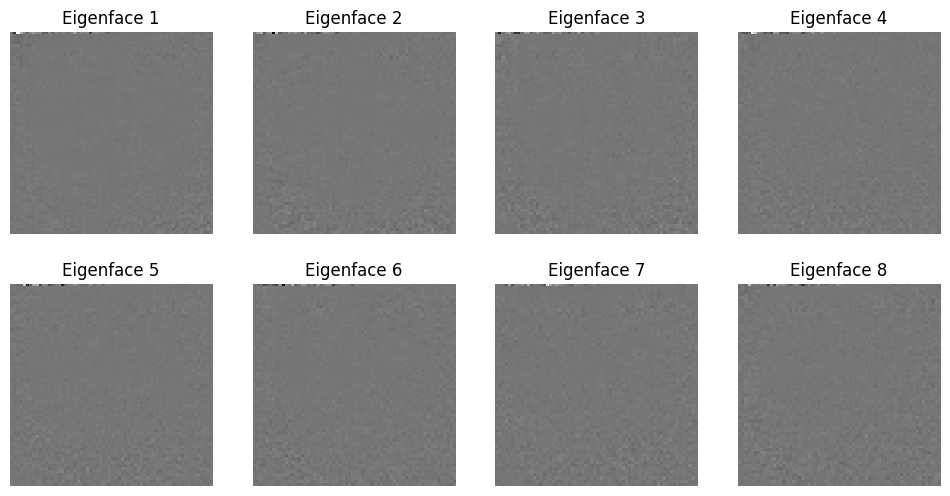

In [10]:
# Step 1: Find global min and max across the top 8 eigenfaces
all_min = min(P[:, i].min() for i in range(8))
all_max = max(P[:, i].max() for i in range(8))

print(f"Global min across top 8 eigenfaces: {all_min}")
print(f"Global max across top 8 eigenfaces: {all_max}")

# Step 2: Visualize with fixed vmin and vmax to ensure consistency
plt.figure(figsize=(12, 6))
for i in range(8):
    eigenface = P[:, i].reshape(64, 64)
    plt.subplot(2, 4, i + 1)
    plt.imshow(eigenface, cmap=plt.cm.gray, vmin=all_min, vmax=all_max)
    plt.title(f"Eigenface {i+1}")
    plt.axis('off')

plt.show()